<span style="font-size: 18px; font-weight: bold">PASTICIER Benjamin</span><br>
<span style="font-size: 18px; font-weight: bold">WEIZMANN Allan</span><br>
<br><br>

<center><span style="font-size: 40px; font-weight: bold">LU3PY121 - Electromagntésime et Optique</span></center><br>
<center><span style="font-size: 35px; font-weight: bold">TP1 - Formation des images</span></center>
<br><br>

<span style="font-size: 30px; font-weight: bold">Sommaire</span>

1. <a href="#Sec1"><span style="font-size: 20px;">Introduction</span></a>
2. <a href="#Sec2"><span style="font-size: 20px;">Lentille et image</span></a>
2. <a href="#Sec3"><span style="font-size: 20px;">Détermination d'une distance focale</span></a>
3. <a href="#Sec4"><span style="font-size: 20px;">L'oeil</span></a>
5. <a href="#Sec5"><span style="font-size: 20px;">Conclusion</span></a>

<br><br><br>

<span style="font-size: 30px; font-weight: bold">Introduction</span> <a class="anchor" id="Sec1"></a>

Ce TP a pour but d'étudier la formation d'images via des systèmes optiques simples, et de vérifier certaines lois les caracérisant.
Dans un premier temps, on regardera comment former l'image d'un objet via une lentille convergente, puis nous étudierons le principe de fonctionnement d'un oeil en préparant un oeil modèle. Enfin, nous analyserons le fonctionnement d'une lunette astronomique, modélisée par un système optique simple constitué de deux lentilles.

In [1]:
# Importation des librairies utiles
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

<br><br><br>
<span style="font-size: 30px; font-weight: bold">Lentille et image</span> <a class="anchor" id="Sec2"></a>

Lorsque l'on fait des essais avec le système optique donné (lentille de focale 10cm), on se rend compte que l'image est réelle (projetée sur un écran) et toujours renversée (car notre lentille est convergente). De plus, si la distance entre l'objet et la lentille est inférieure (respectivement supérieure) à la distance focale de la lentille, l'image de l'objet est rétrécie (respectivement agrandie). Si l'objet est placé sur le foyer objet (donc à la distance focale) de la lentille, son image a une taille identique et est placée sur le foyer image de celle-ci (également à la distance focale).

On vérifié également que selon la distance D, on a un, plusieurs, ou aucun endroit ou peuvent se former les images de l'objet en bougeant la lentille et l'écran.

- si D > 4f , on a deux images possibles
- si D = 4f , on a une seule image possible (image double)
- si D < 4f , aucune image n'est possible.

<br><br><br>

<span style="font-size: 30px; font-weight: bold">Détermination d'une distance focale</span> <a class="anchor" id="Sec3"></a>

<span style="font-size: 20px; font-weight: bold">Utilisation de la relation de conjugaison</span>

<p> Pour une lentille, on a les relations de conjugaison suivantes, respectivement de Descartes et de Newton :</p>

$$ \frac{1}{OA'} - \frac{1}{OA} = \frac{1}{f'}$$  

$$ FA \cdot F'A' = -f'²$$ 

<p> Pour vérifier la 1ère relation, on place une lentille entre un objet et un écran d'observation. En faisant varier la distance D entre l'objet et l'écran, on note OA la distance entre la lentille et l'objet et OA' la distance entre la lentille et l'image. On trace ensuite la courbe de 1/OA' en fonction de 1/OA, et on devrait obtenir une relation linéaire du type ax+b avec a = 1 et b = 1/f' . </p>

<p> L'erreur associée à 1/OA est par propagation des erreurs : </p>

$$ \frac{\delta OA}{OA²} $$

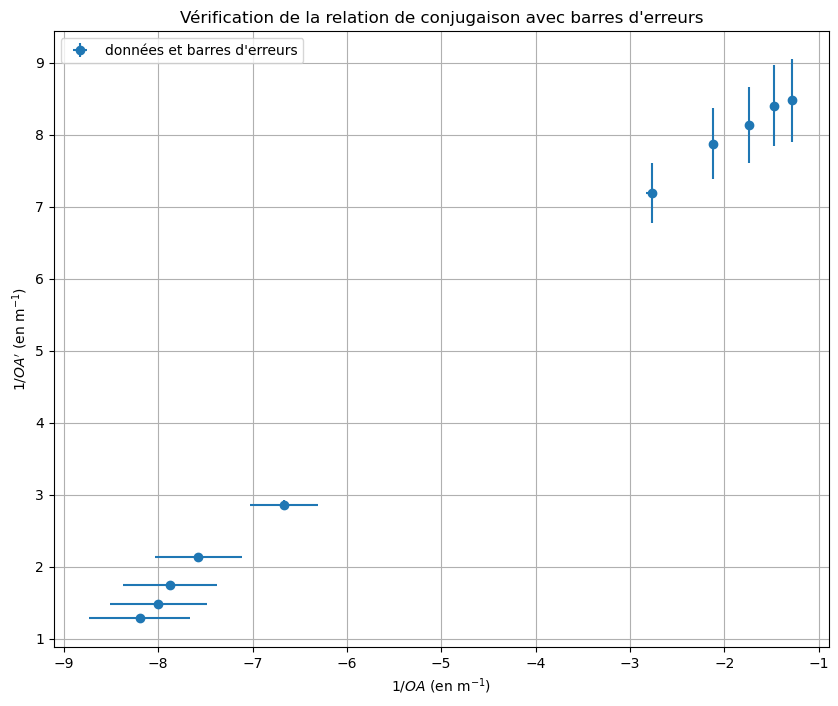

In [29]:
# Données
D = np.array([0.5, 0.5, 0.6, 0.6, 0.7, 0.7, 0.8, 0.8, 0.9, 0.9]) #en m
OA = -np.array([0.150, 0.361, 0.132, 0.473, 0.127, 0.577, 0.125, 0.681, 0.122, 0.782]) # en m
OAprime = np.array([0.350, 0.139, 0.468, 0.127, 0.573, 0.123, 0.675, 0.119, 0.778, 0.118]) # en m

erreurs_OA = np.full((len(OA)), 0.008) # en m, array de 0,004 de la taille de l'array OA
erreurs_OAprime = np.full((len(OAprime)), 0.008) # en m, array de 0,004 de la taille de l'array OAprime


# Calcul de 1/0A, 1/0A', erreurs associées
UnsurOA = 1 / OA
UnsurOAprime = 1 / OAprime

erreurs_UnsurOA = erreurs_OA/OA**2
erreurs_UnsurOAprime =  erreurs_OAprime/OAprime**2


# Graphique
plt.figure(figsize=(10,8))
plt.errorbar(UnsurOA,UnsurOAprime, yerr=erreurs_UnsurOAprime, xerr=erreurs_UnsurOA, fmt='o', label="données et barres d'erreurs")
plt.xlabel("$1/OA$ (en m$^{-1}$)")
plt.ylabel("$1/OA'$ (en m$^{-1}$)")
plt.title("Vérification de la relation de conjugaison avec barres d'erreurs")
plt.legend(loc=2)
plt.grid()

On créé ensuite un ajustement selon la relation de conjugaison de Descartes pour voir si la valeur obtenue est bien la même que la valeur théorique de la lentille.

In [28]:
# Modèle
def conjugaison(x,f):
    ''' 
    Renvoie la valeur théorique de 1/OA' selon 1/OA et f'
    '''
    return x + 1/f


# Paramètres initiaux
f0 = 1
p0 = np.array([f0]) 

print(erreurs_UnsurOAprime.shape)
# Ajustement
popt, cov = curve_fit(conjugaison, UnsurOA, UnsurOAprime, sigma=erreurs_UnsurOAprime, p0=p0)
f_opti = popt # les paramètres d'ajustement

print(f_opti)
print(np.sqrt(cov[0][0]))

(10,)
[0.10506308]
0.0002648300961404914


On obtient finalement un ajustement avec f' = 10,5 cm, et une erreur très faible devant cette valeur (+- 0.02 cm). Cette valeur d'incertitude est très faible, et peut être dûe à une erreur dans nos calculs d'incertitudes initiaux ou une erreur dans l'utilisation de la fonction curve_fit.
<br><br>


<span style="font-size: 20px; font-weight: bold">Méthode d'autocollimation</span>

<p>En plaçant un miroir derrière la lentille, on devrait observer une image renversée de l'objet sur l'objet lui même lorsque l'objet se trouve sur le foyer objet (à la distance focale) de la lentille. En effet, les rayons venant de l'objet seront alors parallèles en sortie de lentille et seront toujours parallèles une fois réfléchis. Ils seront alors renvoyés par la lentille sur le foyer objet.</p>

![scheme.png](attachment:scheme.png)

<p>On remarque que l'orientation du miroir importe peu pendant l'expérience, et on trouve une valeur de f : f = 10.5 cm +- 0.3 cm.
C'est quasiment la même valeur que celle trouvée en utilisant la relation de conjugaison, mais son incertitude est bien plus grande. La méthode d'autocollimation est donc moins précise que la première.</p>

<p>On utilise ensuite l'autocollimation pour plusieurs application.
Si l'on utilise un condenseur associé à un diaphragme, on peut simuler une source lumineuse ponctuelle. Le condenseur permet de concentrer la puissance lumineuse de la lampe dans une plus petite région, ce qui permet d'avoir une intensité correcte pour pouvoir faire des observations après passage par le diaphragme.
On voit alors que le point obtenu sur l'écran est toujours le même quelle que soit la distance à laquelle on place l'écran.</p>

![scheme2.png](attachment:scheme2.png)

<p>Lorsqu'on remplace le diaphragme par une fente, on remarque que la hauteur de l'image change, mais pas sa largeur. En effet, les points éloignés du centre de la fente passent par des points éloignés du centre de la lentille et les rayons ne peuvent plus être considérés comme paraxiaux et on n'est donc plus dans les conditions de Gauss.</p>

<br><br><br>

<span style="font-size: 30px; font-weight: bold">L'oeil</span> <a class="anchor" id="Sec4"></a>

On cherche ensuite à simuler le comportement d'un oeil humain. Pour cela, on crée une image à l'infini qu'on projette sur une lentille de focale 10 cm (environ la taille d'un oeil), qui va ensuite envoyer l'image sur un écran placé au foyer image de cette lentille (l'équivalent de la rétine). Cela simule un oeil au repos (qui regarde à l'infini).

Ensuite, on imagine que le cristallin (notre lentille) peut changer sa focale en contractant des muscles pour permettre à l'oeil de s'adapter et de voir de plus près. On imagine que la focale minimale du cristallin est de 4cm, et on remplace donc notre lentille par une autre ayant cette distance focale. Cela va nous permettre de mesurer le punctum proximum de cette oeil, c'est-à-dire le point le plus proche auquel notre oeil peut former une image nette. C'est simplement la distance à laquelle se trouve un objet qui forme une image nette sur l'écran (qui a été laissé à la même position), et on trouve alors : $$d_{punctus proximum} = 6,8 \pm 0.2 cm$$

On mesure ensuite le grandissement de l'image obtenu à cette distance et on trouve (attention, on prend les distances algébriques): $$\gamma = \frac{-2\text{cm}}{1\text{cm}} = -2$$

![scheme3.png](attachment:scheme3.png)

On a à peu près un grossissement x2, donc un objet de 100 $\mu m$ apparaîtra deux fois plus gros : 200 $\mu m$.

En essayant de mesurer le P.P. D'Allan, on obtient environ 9 cm, et 12 cm avec ses lunettes. On se rend alors bien compte qu'il est super myope !
<br><br><br>

<span style="font-size: 30px; font-weight: bold">Conclusion</span> <a class="anchor" id="Sec5"></a>

Lors de ce TP, on a pu vérifier la relation de conjugaison pour une lentille de deux manières différentes plus ou moins précise. On a également pu regarder les différentes conditions de formation d'une image, et simuler le comportement d'un oeil à l'infini et lorsqu'il s'acclimate.